In [1]:
#Imort all the necessary libraries to run the MoirPy 
from moire import MoireLattice
import numpy as np
import matplotlib.pyplot as plt
from layers import TriangularLayer 

In [2]:
# Make the lattice (Lattice type, a_val, b_val, x_no, y_no, pbc)  #don't put fractional values for x_no and y_no
lattice = MoireLattice(TriangularLayer, 2, 4, 2, 2, pbc = True)

theta = 0.3803 rad (21.7868 deg)
(1008,) bool
(1008,) bool
112 points in lower lattice
112 points in upper lattice


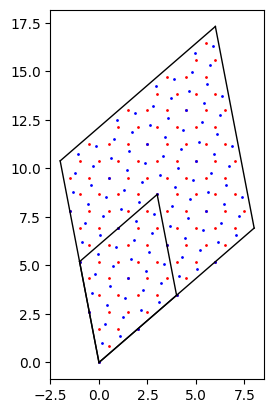

In [3]:
# Plot the lattice with the eigenvectors
lattice.plot_lattice()
# plt.plot(eig

In [4]:
# define t_dd (or hooping in lower and upper layer lattice)
def tuudd(this_coo, neigh_coo):
    gamma = 0.1 # anisotropy parameter
    t0 = 1    # hopping parameter
    theta = np.rad2deg(np.arctan2(neigh_coo[1] - this_coo[1], neigh_coo[0] - this_coo[0]))
    if -5 < theta < 5:            #this if and else conidtion is there to put anisotropy along x-axis (or x' axis)
        return t0 - gamma
    elif theta < -175 or 175 < theta:
        return t0 + gamma
    else:
        return t0

# For gamma = - delta casee, copy the above function and change the value of -gamma 

In [5]:
# Interlayer hopping function
def tul(this_coo, neigh_coo):
    d = 0.1
    t0 = 1
    alpha = 1.1
    dist = np.linalg.norm(np.array(neigh_coo) - np.array(this_coo))
    return t0/(dist**2 + d**2)**alpha

In [6]:
# make the hamiltonian (tuu, tud, tdu, tdd), tuu --> hooping within upper layer.... 
ham = lattice.generate_hamiltonian(tuudd, tuudd, tul, tul)

unique sums in ham_ll: [5.9 6.  6.1]
unique sums in ham_uu: [6.]
unique sums in ham_lu: [  7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218 158.48931925]
unique sums in ham_ul: [  7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7.89379218   7.89379218
   7.89379218   7.89379218   7.89379218   7

In [7]:
#check ham is hermitian
np.allclose(ham, ham.T.conj())

False

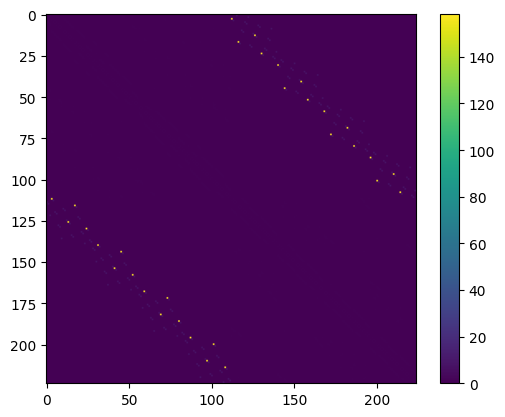

In [8]:
# Show the hamiltonian
plt.imshow(ham)
#show the colorbar
plt.colorbar()

In [9]:
# print the hamiltonian
# print(ham)

In [10]:
# find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(ham)
j = eigenvalues.real.argsort()
eigenvalues = eigenvalues[j]
eigenvectors = eigenvectors[:, j]

Text(0, 0.5, 'Im(E)')

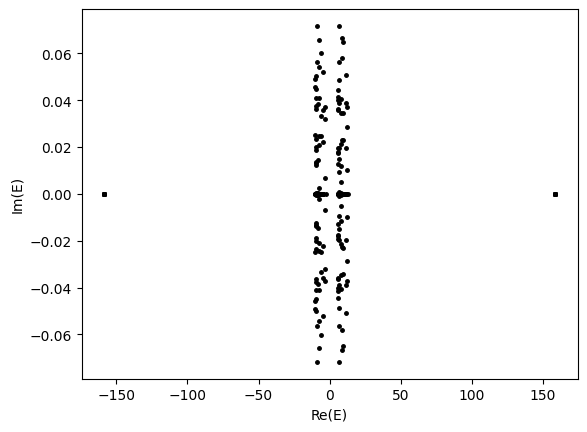

In [11]:
plt.plot(eigenvalues.real, eigenvalues.imag, 'k.', markersize=5)
plt.xlabel('Re(E)') 
plt.ylabel('Im(E)')

In [12]:
# Find a suitable energy level to study the skin effect
energy =  2.3 #2.3 #2.3 #0.02 #1 #0 # 2.3 #1.8 #2.55 #(1 + 0j) 
# energy = 0
idx = np.argmin(np.abs(eigenvalues - energy))
print(eigenvalues[idx])
print(idx)

(5.524226769161474+0.019408494503985924j)
112


In [13]:
N = lattice.lower_lattice.points.shape[0]
R =  idx #np.random.randint(0, 2*N)

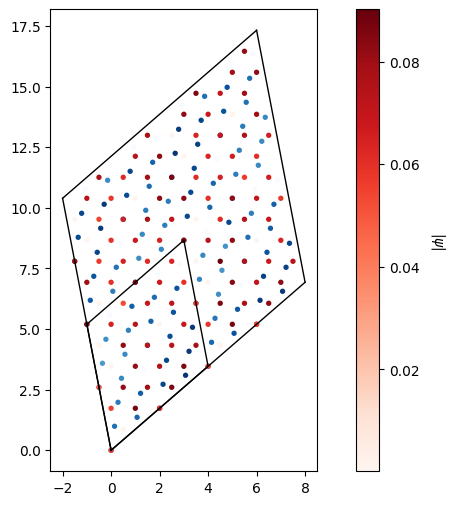

In [14]:
# Plot the states 
plt.figure(figsize=(10, 6))

nx = lattice.nx
ny = lattice.ny
mlv1 = lattice.mlv1
mlv2 = lattice.mlv2



plt.plot([0, nx*mlv1[0]], [0, nx*mlv1[1]], 'k', linewidth=1)
plt.plot([0, ny*mlv2[0]], [0, ny*mlv2[1]], 'k', linewidth=1)
plt.plot([nx*mlv1[0], nx*mlv1[0] + ny*mlv2[0]], [nx*mlv1[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)
plt.plot([ny*mlv2[0], nx*mlv1[0] + ny*mlv2[0]], [ny*mlv2[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)

plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k', linewidth=1)
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'k', linewidth=1)
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], [mlv1[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], [mlv2[1], mlv1[1] + mlv2[1]], 'k', linewidth=1)

plt.scatter(lattice.upper_lattice.points[:, 0], lattice.upper_lattice.points[:, 1], c = np.abs(eigenvectors[:N, R]), cmap='Blues', s = 8)
plt.scatter(lattice.lower_lattice.points[:, 0], lattice.lower_lattice.points[:, 1], c = np.abs(eigenvectors[N:, R]), cmap='Reds', s = 8)
plt.gca().set_aspect('equal', adjustable='box')
dbar = plt.colorbar()  

#set the two color bar for upper and lower points
dbar.set_label(r'$|\psi|$', rotation = 270, labelpad = 20, fontsize=10)
# Put a suitable captions and all for your convenience!

<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_11921/538616034.py:44: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Phase Difference $\phi$")


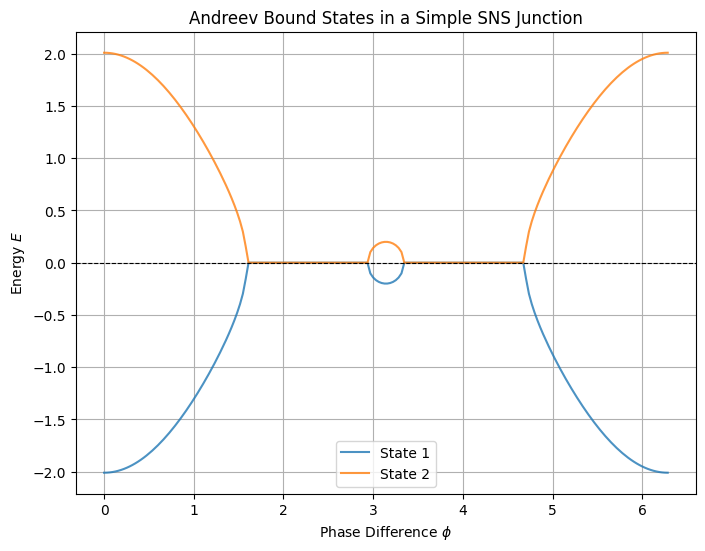

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

# Parameters
t = 1.0  # Hopping amplitude
Delta = 0.5  # Superconducting gap
V_N = 0.1  # Onsite potential in the normal region
phi_vals = np.linspace(0, 2 * np.pi, 200)  # Phase difference across the junction

# Pauli matrices
tau_z = np.array([[1, 0], [0, -1]])
tau_x = np.array([[0, 1], [1, 0]])

# Effective Hamiltonian
def effective_hamiltonian(phi):
    # Normal region Hamiltonian
    H_N = V_N * tau_z
    
    # Superconducting self-energy contributions (left and right)
    Sigma_S_left = -Delta * tau_x
    Sigma_S_right = -Delta * (np.cos(phi) * tau_x + np.sin(phi) * tau_z @ tau_x)
    
    # H_eff: Normal region with coupling to left and right superconductors
    H_eff = H_N + Sigma_S_left + Sigma_S_right
    return H_eff

# Compute Andreev bound states
energies = []
for phi in phi_vals:
    H_eff = effective_hamiltonian(phi)
    eigenvalues = eigvals(H_eff)  # Compute eigenvalues
    real_energies = np.sort(eigenvalues.real)  # Take real part (bound states)
    energies.append(real_energies)

energies = np.array(energies)

# Plot the Andreev bound states
plt.figure(figsize=(8, 6))
for i in range(energies.shape[1]):
    plt.plot(phi_vals, energies[:, i]/Delta, label=f"State {i+1}" if i < 2 else "", alpha=0.8)

plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("Phase Difference $\phi$")
plt.ylabel("Energy $E$")
plt.title("Andreev Bound States in a Simple SNS Junction")
plt.legend()
plt.grid()
plt.show()
